# Label Analysis

In this notebook we analyse the datsets and label distributions we get for different settings for sampling and labeling strategy.

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datasets import HighQualityFallDataset
from datasets.transforms.label_strategy import PriorityLabel, HQFD_LABEL_DESCRIPTION
from datasets.transforms.sampling_strategy import UniformSampling, GaussianSampling

In [4]:
ANN_FILE = "data/Fall_Simulation_Data/annotations.csv"

uniform_sampling = UniformSampling(clip_len=10, stride=0, overlap=False)
gaussian_sampling = GaussianSampling(
    clip_len=10, n_samples_per_sec=None, fallback_sampler=None, std=None
)
label_strategy = PriorityLabel(
    label_description=HQFD_LABEL_DESCRIPTION,
    threshold=0.0,
    absolute_threshold=False,
    priority=[0, 1, 2],
)

hqfd = HighQualityFallDataset(
    ann_file=ANN_FILE,
    sampling_strategy=gaussian_sampling,
    label_strategy=label_strategy,
    pipeline=[],
    num_classes=3,
    test_mode=True,
)

df_hqfd = pd.DataFrame(list(hqfd))
class_names = ["Fall", "Lying", "Other"]
df_hqfd["label_name"] = df_hqfd["label"].apply(lambda x: class_names[x])
df_hqfd.head()

,filename,label,interval,sample_idx,modality,start_index,label_name
0,data/Fall_Simulation_Data/videos/ADL17_Cam1.avi,2,"(0.0, 10.0)",0,RGB,0,Other
1,data/Fall_Simulation_Data/videos/ADL17_Cam1.avi,2,"(10.0, 20.0)",1,RGB,0,Other
2,data/Fall_Simulation_Data/videos/ADL17_Cam1.avi,2,"(20.0, 30.0)",2,RGB,0,Other
3,data/Fall_Simulation_Data/videos/ADL17_Cam1.avi,2,"(30.0, 40.0)",3,RGB,0,Other
4,data/Fall_Simulation_Data/videos/ADL17_Cam1.avi,2,"(40.0, 50.0)",4,RGB,0,Other


'---- Label Distribution ----'

label_name
Fall     0.118824
Lying    0.080790
Other    0.800386
Name: count, dtype: float64

'---- Label Counts ----'

label_name
Fall      1787
Lying     1215
Other    12037
Name: count, dtype: int64

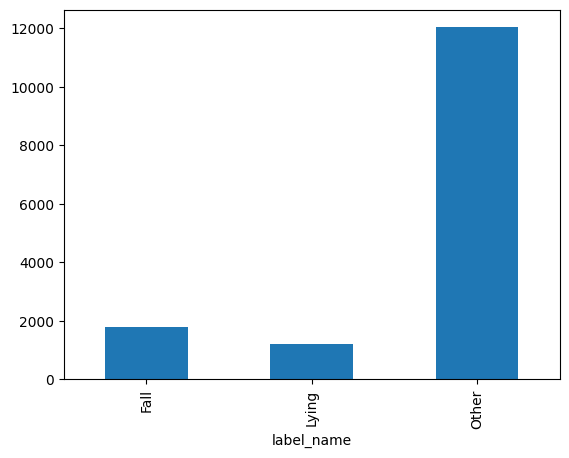

In [5]:
display("---- Label Distribution ----")
display(df_hqfd["label_name"].value_counts().sort_index() / len(df_hqfd))


display("---- Label Counts ----")
display(df_hqfd["label_name"].value_counts().sort_index())
df_hqfd["label_name"].value_counts().sort_index().plot(kind="bar")
plt.show()